# Thrust, the rocket equation, flight trajectory

In [1]:
import numpy as np
from scipy.optimize import root_scalar
from matplotlib import pyplot as plt
from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity


In [2]:
# these lines are only for helping improve the display
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'png')
plt.rcParams['figure.dpi']= 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['mathtext.fontset'] = 'cm'

## Thrust

In the last module, the expression for thrust from a rocket (or any propulsion system relying
on an exhaust jet) was given. Let's now derive that, 
by considering a rocket undergoing a static test fire (where it is held in place by a test stand
that counteracts the thrust force).

Let's draw a control surface just around the rocket, with the exhaust jet crossing the boundary
at the exit of hte nozzle, and apply conservation of momentum in the horizontal direction:
$$
\sum F_x = \dot{m} V_{\text{out}} - \cancel{\dot{m} V_{\text{in}}} \\
R_x + \cancel{D} + A_e (p_a - p_e) = \dot{m} V_e \;,
$$

where the reaction force $R_x$ imparted by the test stand (to hold the rocket in place)
is the same as the thrust force: $| R_x | = T$.
Then, for thrust, we have:

$$
\begin{align}
T &= \dot{m} V_e + A_e (p_e - p_a) \\
 &= T_m + T_p \;,
\end{align}
$$

where $T_m$ refers to the momentum flux thrust and $T_p$ refers to the pressure thrust terms.
If $p_e < p_a$, or the nozzle is overexpanded, then the pressure thrust is negative and
reduces the overall thrust.
Typically, though, nozzles are designed such that $p_e \geq p_a$.

In the vacuum of space (or near-vacuum),

$$
T = \dot{m} V_e + p_e A_e \;.
$$

### Effective exhaust velocity

The **effective exhaust velocity**, $c$, is defined as the actual thrust divided by the 
mass flow rate:

$$
\begin{align}
c &= \frac{T}{\dot{m}} = \frac{\dot{m} V_e + A_e (p_e - p_a)}{\dot{m}} \\
c &= V_e + \frac{A_e (p_e - p_a)}{\dot{m}} \;.
\end{align}
$$

This allows us to express thrust as

$$
T = \dot{m} c
$$

and we can relate effective exhaust velocity to specific impulse:

$$
c = I_{\text{sp}} g_0 \;.
$$

## The rocket equation

We now have an expression for thrust of a rocket, considering static firing on a test stand.
What about a rocket in motion, which is continuously exhausting propellant mass to generate thrust?
If we apply Netwon's second law, we can obtain the Tsiolkovsky **rocket equation**.

Consider a rocket in motion in some arbitrary flight direction, where we assume
- thrust in the direction of flight (no thrust vectoring)
- steady thrust, and 
- no lift generated by the rocket body.

Applying Newton's second law:

```{math}
:label: eq-newton-flight
m \frac{dV}{dt} = \sum F_F = T - D - m g \sin \theta \,;
```

where the $_F$ subscript indicates in the direction of flight, and

```{math}
:label: eq-newton-normal
m V \frac{d\theta}{dt} = \sum F_{\perp} = -mg \cos \theta \;,
```

where the $_{\perp}$ subscript indicates in the direction normal to flight.
Now, let's insert our expression for thrust $T = \dot{m}c$ into Equation [](#eq-newton-flight),
and recall that the rate of change of the rocket's mass is related to 
the mass flow rate of exhausting propellant: $-\dot{m} = \frac{dm}{dt}$:

:::{note}
If thrust and the mass flow rate of propellant are steady, then we can easily
solve for the rate of change of mass with time: $m(t) = m_0 - \dot{m} t$,
where $m_0$ is the initial overall mass of the vehicle.
:::

$$
\begin{align}
m \frac{dV}{dt} &= \dot{m} c - D - m g \sin \theta \\
\frac{dV}{dt} &= \frac{\dot{m}}{m} c - \frac{D}{m} - g \sin \theta
\end{align}
$$

```{math}
:label: eq:rocket-differential
\rightarrow dV = -\frac{dm}{m} c - \frac{D}{m} dt - (g \sin \theta) dt
```

We can integrate this from time $t = 0$ to any time $t_b$, or the burnout time
when the rocket stops thrusting and no longer exhausts propellant:

$$
V_f - V_0 = \Delta V = -c \int_{m_0}^{m_f} \frac{dm}{m} -  \int_0^{t_b} \frac{D}{m} dt - \int_0^{t_b} (g \sin \theta) dt
$$

or, to obtain Tsiolkovsky's rocket equation:
```{math}
:label: eq:tsiolkovsky-rocket
\boxed{\Delta V = c \ln \frac{m_0}{m_f} - \int_0^{t_b} \frac{D}{m(t)} dt - \int_0^{t_b} (g(t) \sin \theta) dt} \;,
```
where $m_0$ refers to the initial vehicle mass, $m_f$ refers to the final vehicle mass at time $t_b$,
and in general drag force, gravity, and flight direction may vary with time: 
$D = D(t)$, $g = g(t)$, and $\theta = \theta(t)$.
The integral involving drag represents the net reduction in $\Delta V$ due to drag,
while the integral involving gravity is the "gravity loss", or the net loss due to carrying
the rocket's mass in gravity (sometimes called "G-T loss".)

If we neglect the gravity and drag terms, we can simplify:
$$
\Delta V = c \ln \frac{m_0}{m_f} \;.
$$
and, we can define the rocket **mass ratio** ($R$ or MR):
```{math}
:label: eq:mass-ratio
R = \frac{m_f}{m_0} \;.
```
In addition, recalling the definition of effective exhaust velocity $c = I_{\text{sp}} g_0$:

```{math}
:label: eq:rocket-equation
\Delta V = I_{\text{sp}} g_0 \ln \frac{1}{R} \;,
```

which is the famous form of the rocket equation.
This relates specific impulse of the propulsion system (which comes from propellant choice), 
mass ratio of the rocket,
and the resulting total change in velocity, which is driven by mission requirements.

:::{warning}
Some textbook authors define the mass ratio inversely, as $\frac{m_0}{m_f}$.
The choice should be obvious, as the value will be either greater than one or less than one,
but make sure you are consistent.
:::

Another commonly used dimensionless quantity is the **propellant mass fraction**,
or the ratio of (initial) propellant mass to overall initial mass:
$$
\xi = \frac{m_p}{m_0} = 1 - R
$$

### Example: propellant mass fraction

Now that we have the rocket equation, let's see how much propellant is needed
for a launch vehicle taking off from sea level to achieve escape velocity from Earth, 
which is around 12 km/s.

**Find:** What percentage of a launch vehicle's initial mass must be devoted to propellant,
if the vehicle's rocket engine has a specific impulse of 300 s? Neglect gravity and drag effects.

The vehicle is starting at rest on the ground ($V = 0$), so $\Delta V = 12000$ m/s.
Using Equation [](#eq:rocket-equation) and solving for the mass fraction:

$$
\begin{align}
\Delta V &= I_{\text{sp}} g_0 \ln \frac{1}{R} \\
e^{\frac{\Delta V}{I_{\text{sp}} g_0}} &= \frac{1}{R} \\
R &= e^{-\frac{\Delta V}{I_{\text{sp}} g_0}}
\end{align}
$$

In [3]:
Isp = Q_(300, 's')
g0 = Q_(9.81, 'm/s^2')
delta_V = Q_(12, 'km/s')

R = np.exp(-delta_V / (Isp * g0))
print(f'R = {R.magnitude:.3f}')

propellant_fraction = 1 - R
print(f'propellant mass fraction = {propellant_fraction.magnitude:.3f}')

R = 0.017
propellant mass fraction = 0.983


So, assuming all propellant is expended when the burn is completed 
(when $\Delta V$ has been achieved), then **98.3%** of the inital mass of the vehicle
must be propellant!

In general, $R > 0.85$ is difficult to achieve physically, 
and $R \to 0.95$ is probably the upper limit realistically.
This is why a single-stage-to-orbit launch vehicle does not exist,
and why in general we need *multiple stages* for launch vehicles.

## Effects of gravity

Now, let's consider the vertical launch of a rocket perpendicular to the planet's surface
(in other words, a *sounding rocket*), 
considering the effect of gravity but still neglecting drag.
The flight/thrust direction is aligned with gravity, with no $\theta$ to worry about.
Our goal is to find the velocity at **burnout** (when thrust has stopped) and 
the maximum height reached.

There are two flight regimes:
1. burn (when undergoing thrust), and
2. coast.

First, let's find the velocity and height associated with the burn phase.
Take Equation [](#eq:rocket-differential), dropping the drag term,
and integrate from $t = 0$ (where $V(t=0) = 0$ and $m(t=0)=m_0$)
to a general time $t$ where $V(t)$:
$$
\int_0^V dV = -c \int_{m_0}^m \frac{dm}{m} - \int_0^t g dt \;,
$$
where the final term is called the *gravity loss* term, or "G-T loss".
This represents the loss in performance caused by thrusting under the effect
of gravity.
Let's assume $g$ is constant with time (and height); this is not strictly true,
as the acceleration due to gravity varies with altitude somewhat,
but assuming as constant is a reasonable approximation for now.
However, mass does vary substantially with time, 
based on the propellant mass flow rate $\dot{m}$:
$$
m(t) = m_0 - \dot{m} t \;. 
$$

:::{note}
Gravity also varies with altitude somewhat, even when remaining inside the atmosphere,
but we can neglect this for now.
:::

Integrating the above equation gives velocity as a function of time:

$$
\begin{align}
V(t) &= -c \ln \frac{m(t)}{m_0} - g t \\
V(t) &= -c \ln \frac{m_0 - \dot{m} t}{m_0} - g t \;.
\end{align}
$$

The velocity at the burnout time $t_b$ is then:

```{math}
:label: eq:burnout-velocity-gravity
\boxed{V_b = c \ln \frac{m_0}{m_0 - \dot{m}t_b} - gt_b} \;.
```

To find the height at burnout, we can integrate velocity with respect to time:
$$
V(t) = \frac{dh}{dt} \;.
$$
so

$$
\begin{align}
V(t) = \frac{dh}{dt} &= c \ln\frac{m_0}{m_0 - \dot{m}t} - gt \\
dh &= c \ln\frac{m_0}{m_0 - \dot{m}t} dt - gt \, dt \\
\int_0^{t_b} dh &= \int_0^{t_b} c \ln\frac{m_0}{m_0 - \dot{m}t}dt - \int_0^{t_b} gt \, dt
\end{align}
$$
```{math}
:label: eq:burnout-height-gravity
\therefore \boxed{h_b = t_b c \left(\frac{m_f}{m_0 - m_f} \ln\frac{m_f}{m_0} + 1\right) - \frac{g}{2} t_b^2} \;,
```

where the final mass is $m(t_b) = m_f$.

Now, to find the maximum height, we need to consider the coast regime.
After the rocket stops thrusting (at burnout), it still has kinetic energy.
The coast distance is then based on conversion of this kinetic energy (KE) to potential energy (PE),
with subscript *b* representing burnout location and *m* representing the maximum height:

$$
\begin{align}
\text{KE}_b + \text{PE}_b &= \text{KE}_m + \text{PE}_m \\
\frac{1}{2}m_f V_b^2 + m_f g_0 h_b &= 0 + m_f g_0 h_m \\
\frac{1}{2}V_b^2 = g_0(h_m - h_b) &= g_0 \Delta h_{\text{coast}} \\
\rightarrow \Delta h_{\text{coast}} &= \frac{\frac{1}{2}V_b^2}{g_0} \;,
\end{align}
$$

and the maximum height is then
$$
\boxed{h_m = h_b + \Delta h_{\text{coast}}} \;.
$$

### Example: escape velocity considering gravity loss, max acceleration

Now, let's take another look at a single-stage rocket trying to achieve escape velocity
from Earth (around 12 km/s). 

**Find:** The percentage of a launch vehicle's initial mass that must be
devoted to propellant to achieve escape velocity, including the effects of gravity.
Neglect drag, and assume a specific impulse of 300 s. 
In addition, human passengers onboard must not be exposed to greater than $6g$ of acceleration.

This problem has some additional complexity and restrictions!
First, let's introduce the concept of **thrust-to-weight ratio**:
$$
\eta = \frac{T}{m g_0} = \frac{a}{g_0} \;,
$$
which we can see also indicates the acceleration of the vehicle with respect to 
gravitational acceleration.
For our problem, we are restricted to $\eta_{\max} = 6$.

If we assume a constant thrust, due to the decreasing mass of the vehicle
the peak acceleration will occur at burnout ($t_b$), since the mass will be lowest:
$$
T = m_f \eta_{\max} g_0 \;.
$$

We need to find an expression for burnout velocity, based on 
Equation [](#eq:burnout-velocity-gravity), that incorporates these restrictions, and
solve for the mass ratio $R = \frac{m_f}{m_0}$.

Recalling the definition of thrust, we can express mass flow rate using:

$$
\begin{align}
T &= \dot{m} I_{\text{sp}} g_0 = m_f \eta_{\max} g_0 \\
\rightarrow \dot{m} &= m_f \frac{\eta_{\max}}{I_{\text{sp}}} \;.
\end{align}
$$

and then express the burnout time based on this mass flow rate expression:

$$
\begin{align}
m_f &= m_0 - \dot{m} t_b \\
t_b &= \frac{m_0 - m_f}{\dot{m}} = \frac{m_0 - m_f}{m_f} \frac{I_{\text{sp}}}{\eta_{\max}} \\
t_b &= \left( \frac{1}{R} - 1 \right) \frac{I_{\text{sp}}}{\eta_{\max}} \;.
\end{align}
$$

Finally, incorporating this into the burnout velocity Equation [](#eq:burnout-velocity-gravity):

$$
\begin{align}
V_b &= I_{\text{sp}} g_0 \ln \frac{1}{R} - g_0 \left( \frac{1}{R} - 1 \right) \frac{I_{\text{sp}}}{\eta_{\max}} \\
\rightarrow V_b &= I_{\text{sp}} g_0 \left[ \ln \frac{1}{R} - \frac{1}{\eta_{\max}} \left( \frac{1}{R} - 1 \right) \right] \;.
\end{align}
$$

We can attempt to solve this numerically for the mass ratio $R$.

In [37]:
def burnout_velocity_max_accel(mass_ratio, spec_impulse, eta_max):
    '''Calculates burnout velocity with a maximum acceleration.
    '''
    g0 = Q_(9.81, 'm/s^2')
    return (spec_impulse * g0 * (
        np.log(1./mass_ratio) - (1./mass_ratio - 1.) / eta_max
        )
    )

def root_burnout_velocity_max_accel(mass_ratio, burnout_velocity, spec_impulse, eta_max):
    '''Uses to find root (mass ratio) of burnout velocity equation.
    '''
    return (
        burnout_velocity - 
        burnout_velocity_max_accel(mass_ratio, spec_impulse, eta_max)
    ).to('m/s').magnitude

Isp = Q_(300, 's')
delta_V = Q_(12, 'km/s')
eta_max = 6.

sol = root_scalar(
    root_burnout_velocity_max_accel, x0=0.05, x1=0.02,
    args=(delta_V, Isp, eta_max)
    )
print(sol)

      converged: False
           flag: convergence error
 function_calls: 52
     iterations: 50
           root: nan
         method: secant


/var/folders/ng/d9rd9fb92c7bxz9fy7vwpj7m0000gp/T/ipykernel_86697/4144098129.py:6: RuntimeWarning: invalid value encountered in log
  np.log(1./mass_ratio) - (1./mass_ratio - 1.) / eta_max


This means that the algorithm is not able to find a solution.
Practically, a single-stage rocket is not able to reach this velocity while keeping
acceleration limited to a value survivable by humans.

What burnout velocity *can* we get with acceleration limited to $6g$, 
using the lowest possible practical mass ratio value of 0.05?

In [52]:
mass_ratio = 0.1
Isp = Q_(300, 's')
eta_max = 6.

delta_V = burnout_velocity_max_accel(mass_ratio, Isp, eta_max)
print(f'Highest reasonable ΔV = {delta_V.to('km/s'): .2f}')

Highest reasonable ΔV =  2.36 kilometer / second


This is much lower than the escape velocity! 

What does this tell us? That a single-stage rocket is not practical for a launch vehicle
aiming to leave Earth's orbit and contain humans.

## Effects of drag

Looking at Equations [](#eq:burnout-velocity-gravity) and [](#eq:burnout-height-gravity) for maximum burnout velocity and height in vacuum (meaning, neglecting the effects of drag caused by atmosphere), it would appear that we want to have the shortest possible burn time, getting the rocket to the burnout
velocity faster and earlier.

We can examine that idea, looking at burnout velocity and height for $R = 0.1$ and a range of burnout times:

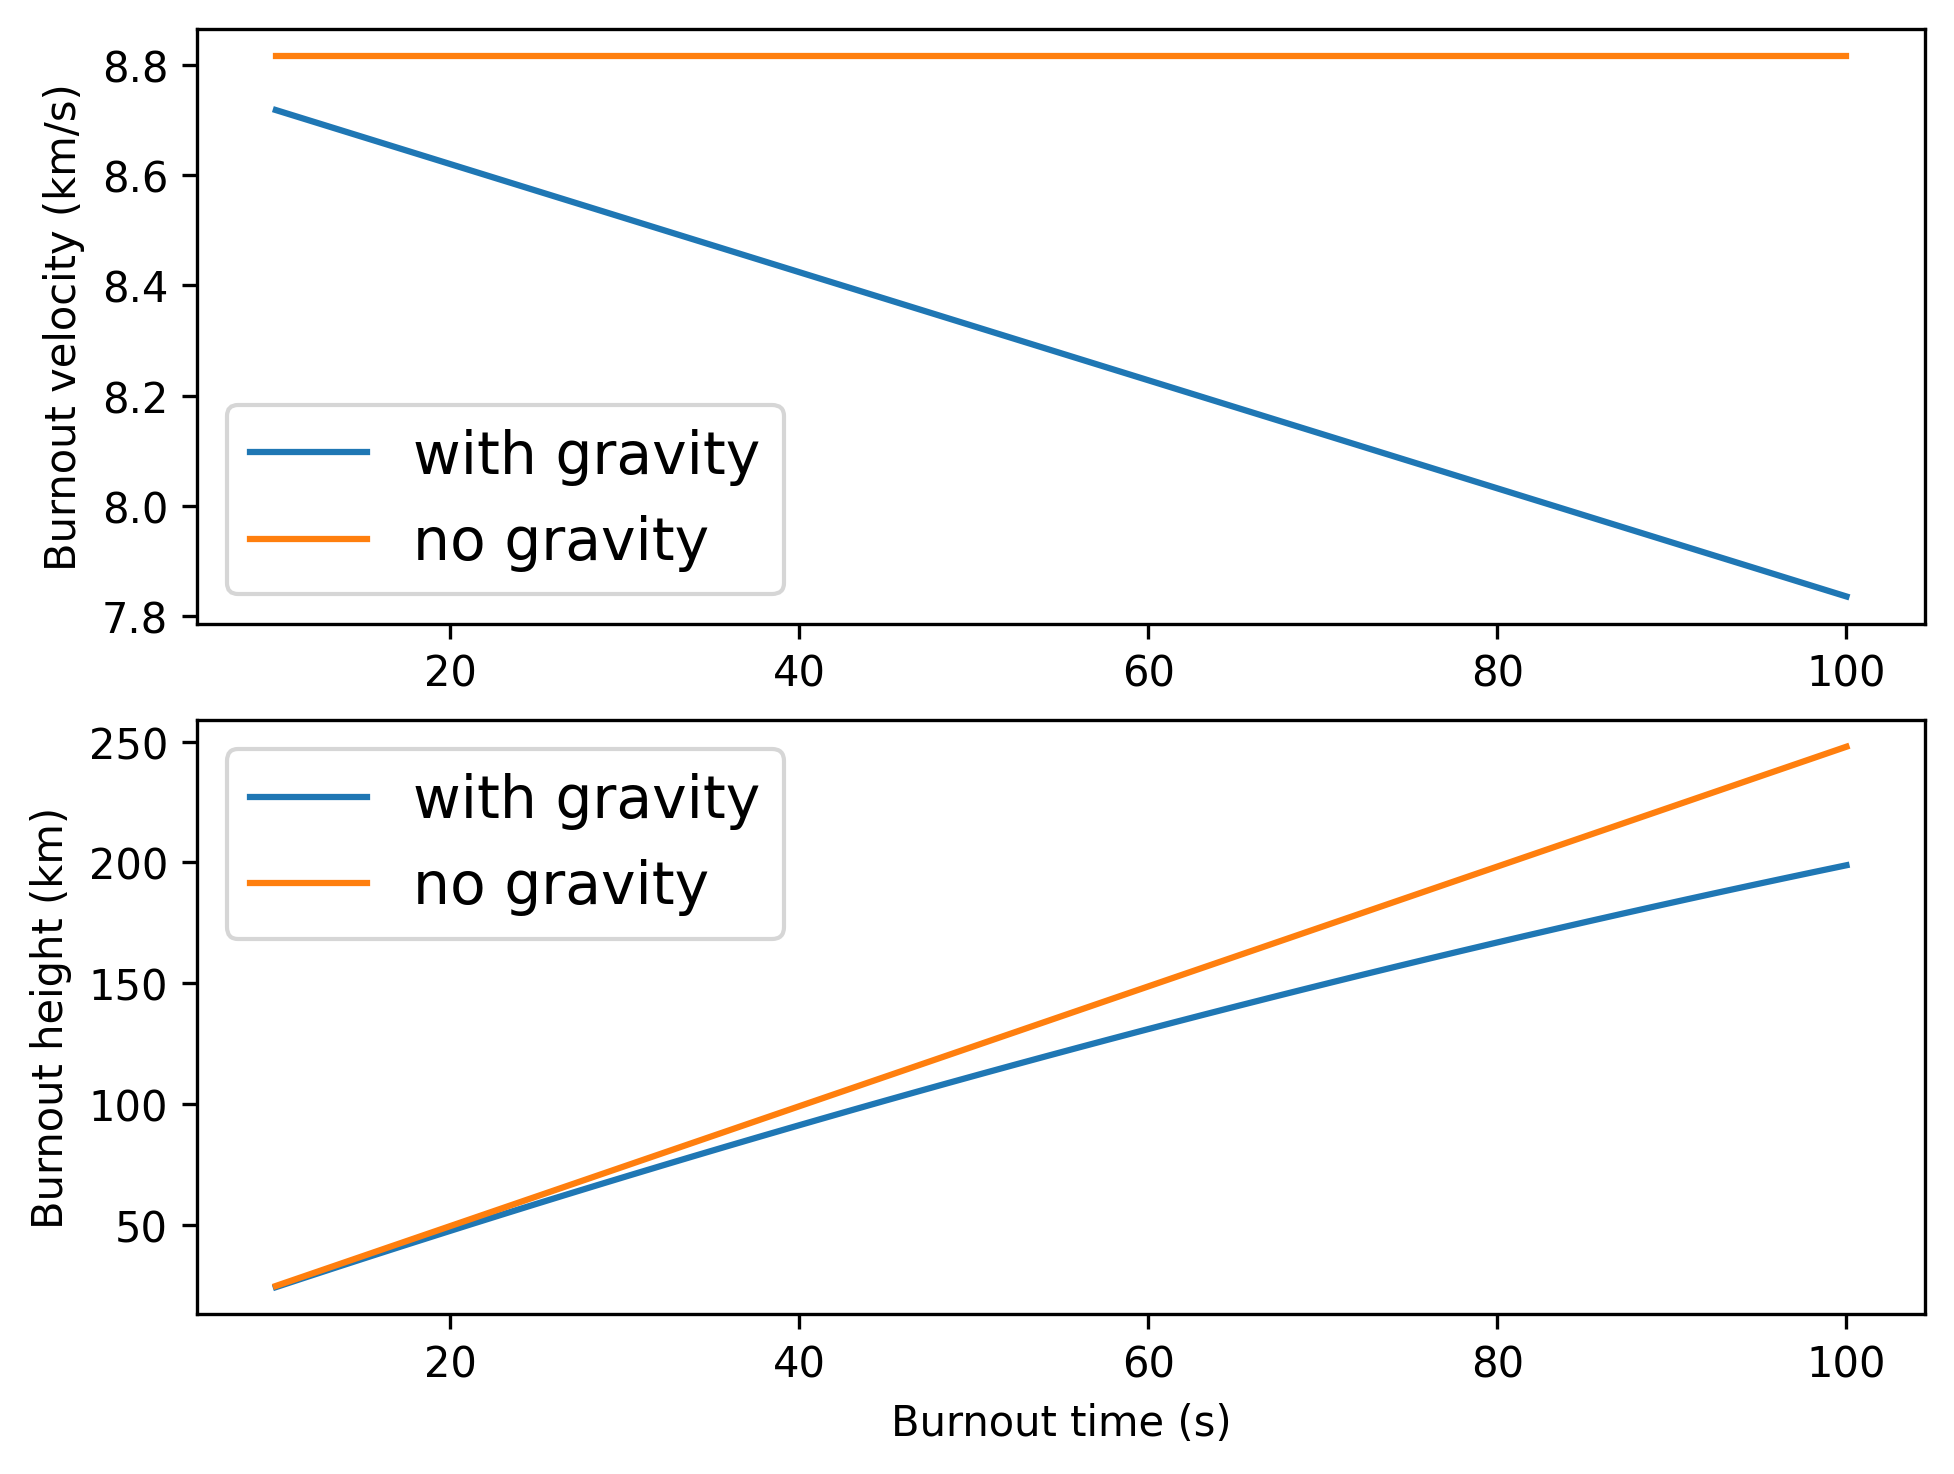

In [67]:
Isp = Q_(300, 's')
mass_ratio = 0.05

burnout_times = Q_(np.linspace(10, 100), 's')
burnout_heights = (
    burnout_times * Isp * g0 * (mass_ratio / (1. - mass_ratio) * np.log(mass_ratio) + 1) -
    burnout_times**2 * g0 / 2.
    )
burnout_velocities = (
    -Isp * g0 * np.log(mass_ratio) - g0 * burnout_times
)

burnout_heights_nog = (
    burnout_times * Isp * g0 * (mass_ratio / (1. - mass_ratio) * np.log(mass_ratio) + 1)
    )
burnout_velocities_nog = (
    -Isp * g0 * np.log(mass_ratio)
) * np.ones_like(burnout_times)

fig, axes = plt.subplots(nrows=2, layout='constrained')
axes[0].plot(burnout_times.magnitude, burnout_velocities.to('km/s').magnitude, label='with gravity')
axes[0].plot(burnout_times.magnitude, burnout_velocities_nog.to('km/s').magnitude, label='no gravity')
axes[0].legend(fontsize=14, loc='lower left')
axes[0].set_ylabel('Burnout velocity (km/s)')

axes[1].plot(burnout_times.magnitude, burnout_heights.to('km').magnitude, label='with gravity')
axes[1].plot(burnout_times.magnitude, burnout_heights_nog.to('km').magnitude, label='no gravity')
axes[1].legend(fontsize=14)
axes[1].set_xlabel('Burnout time (s)')
axes[1].set_ylabel('Burnout height (km)')
plt.show()

The gravity loss (or gravity "drag") reduces the burnout velocity, or ΔV, with increasing burnout time.
So, in theory, this says that we'd want the shortest possible burnout time.

(Looking at burnout height, the result is a bit more complex: clearly, increasing burnout time means that gravity loss grows with respect to thrusting without the effect of gravity, but overall increasing burnout time leads to increasing burnout height. This is because we acheive height by thrusting over time, since it's the time integral of velocity.)

However, drag force is a strong function of altitude, since air is more dense at lower altitudes.
So, we want lower velocity at lower altitudes, because from fluid dynamics, we know how to calculate drag force in general:
$$
D = \frac{1}{2} \rho V^2 A C_D \;,
$$
where $\rho$ is the atmospheric density (a function of altitude),
$A$ is the cross-sectional area facing the oncoming flow, and
$C_D$ is the drag coefficient, which depends on angle of attack, geometry, and Mach number.
We can express Mach number as
$$
M = \frac{V}{\sqrt{\gamma p(h) / \rho(h)}} \;.
$$

For example, {numref}`V2-diagrams` shows how the coefficients of lift and drag vary
for the German V-2 rocket with Mach number and angle of attack.

```{figure} ../images/V2-lift-drag-coefficient.png
:label: V2-diagrams
:alt: V2 rocket coefficients of lift and drag
:width: 500px
:align: center

Variation of coefficients of drag and lift with Mach number and angle of attack,
for the German V-2 rocket. Source: {cite}`sutton2016rocket`.
```

### Variation of atmospheric density

Atmospheric density varies strongly with altitude, and this needs to be incorporated into
the calculation of drag.
There are different models for atmospheric properties, but we can approximate the variation of density with a relatively simple model:
$$
\rho(h) = \rho_0 e^{-h / H_n} \;,
\label{eq:atm-density}
$$
where $H_n = 10.4 \, \text{km}$ is the height scale of the exponential fall for density (also approximately the troposphere) and $\rho_0 = 1.225 \, \text{kg}/\text{m}^3$ is the standard density of air at sea level.

Assuming the atmsophere is hydrostatic, and acceleration due to gravity remains constant, then

$$
\begin{align}
\frac{dp}{dh} &= -g \rho(h) \\
\int_{p_0}^p dp &= -\int_0^h g \rho_0 e^{-h / H_n} dh \\
p(h) &= p_0 + g \rho_0 H_n \left(e^{-h / H_n} - 1 \right) \;. \label{eq:atm-pressure}
\end{align}
$$

Alternatively, a similar exponential expression directly for pressure can be used:
$$
p(h) = p_0 e^{-h / H_p} \;,
\label{eq:atm-pressure-exp}
$$
where $p_0 = $ 101325 Pa is the sea-level standard atmospheric pressure and $H_p​ =$ 8.4 km.

Equations [](#eq:atm-density) and [](#eq:atm-pressure), or [](#eq:atm-pressure-exp),
give simple and reasonably useful expressions for the variation of density and pressure
in the atmosphere.
However, more-accurate calculations should use established models. These include the
1976 U.S. Standard Atmosphere {cite:p}`standard_atmosphere_1976` and 1975 ISO Standard Atmosphere {cite:p}`iso_standard_atmosphere_1975`, which model how pressure, temperature, density, etc., vary
with altitude in the atmosphere, and provides reasonable answers for up to about 86 km.
The [`fluids` package](https://github.com/CalebBell/fluids) provides a convenient interface to the 1976 U.S. Standard Atmosphere model in Python {cite:p}`fluids`,
along with other models such as the NRLMSISE-00 model {cite:p}`Picone2002`, which applies up to 1000 km.

/var/folders/ng/d9rd9fb92c7bxz9fy7vwpj7m0000gp/T/ipykernel_86697/2540409300.py:27: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


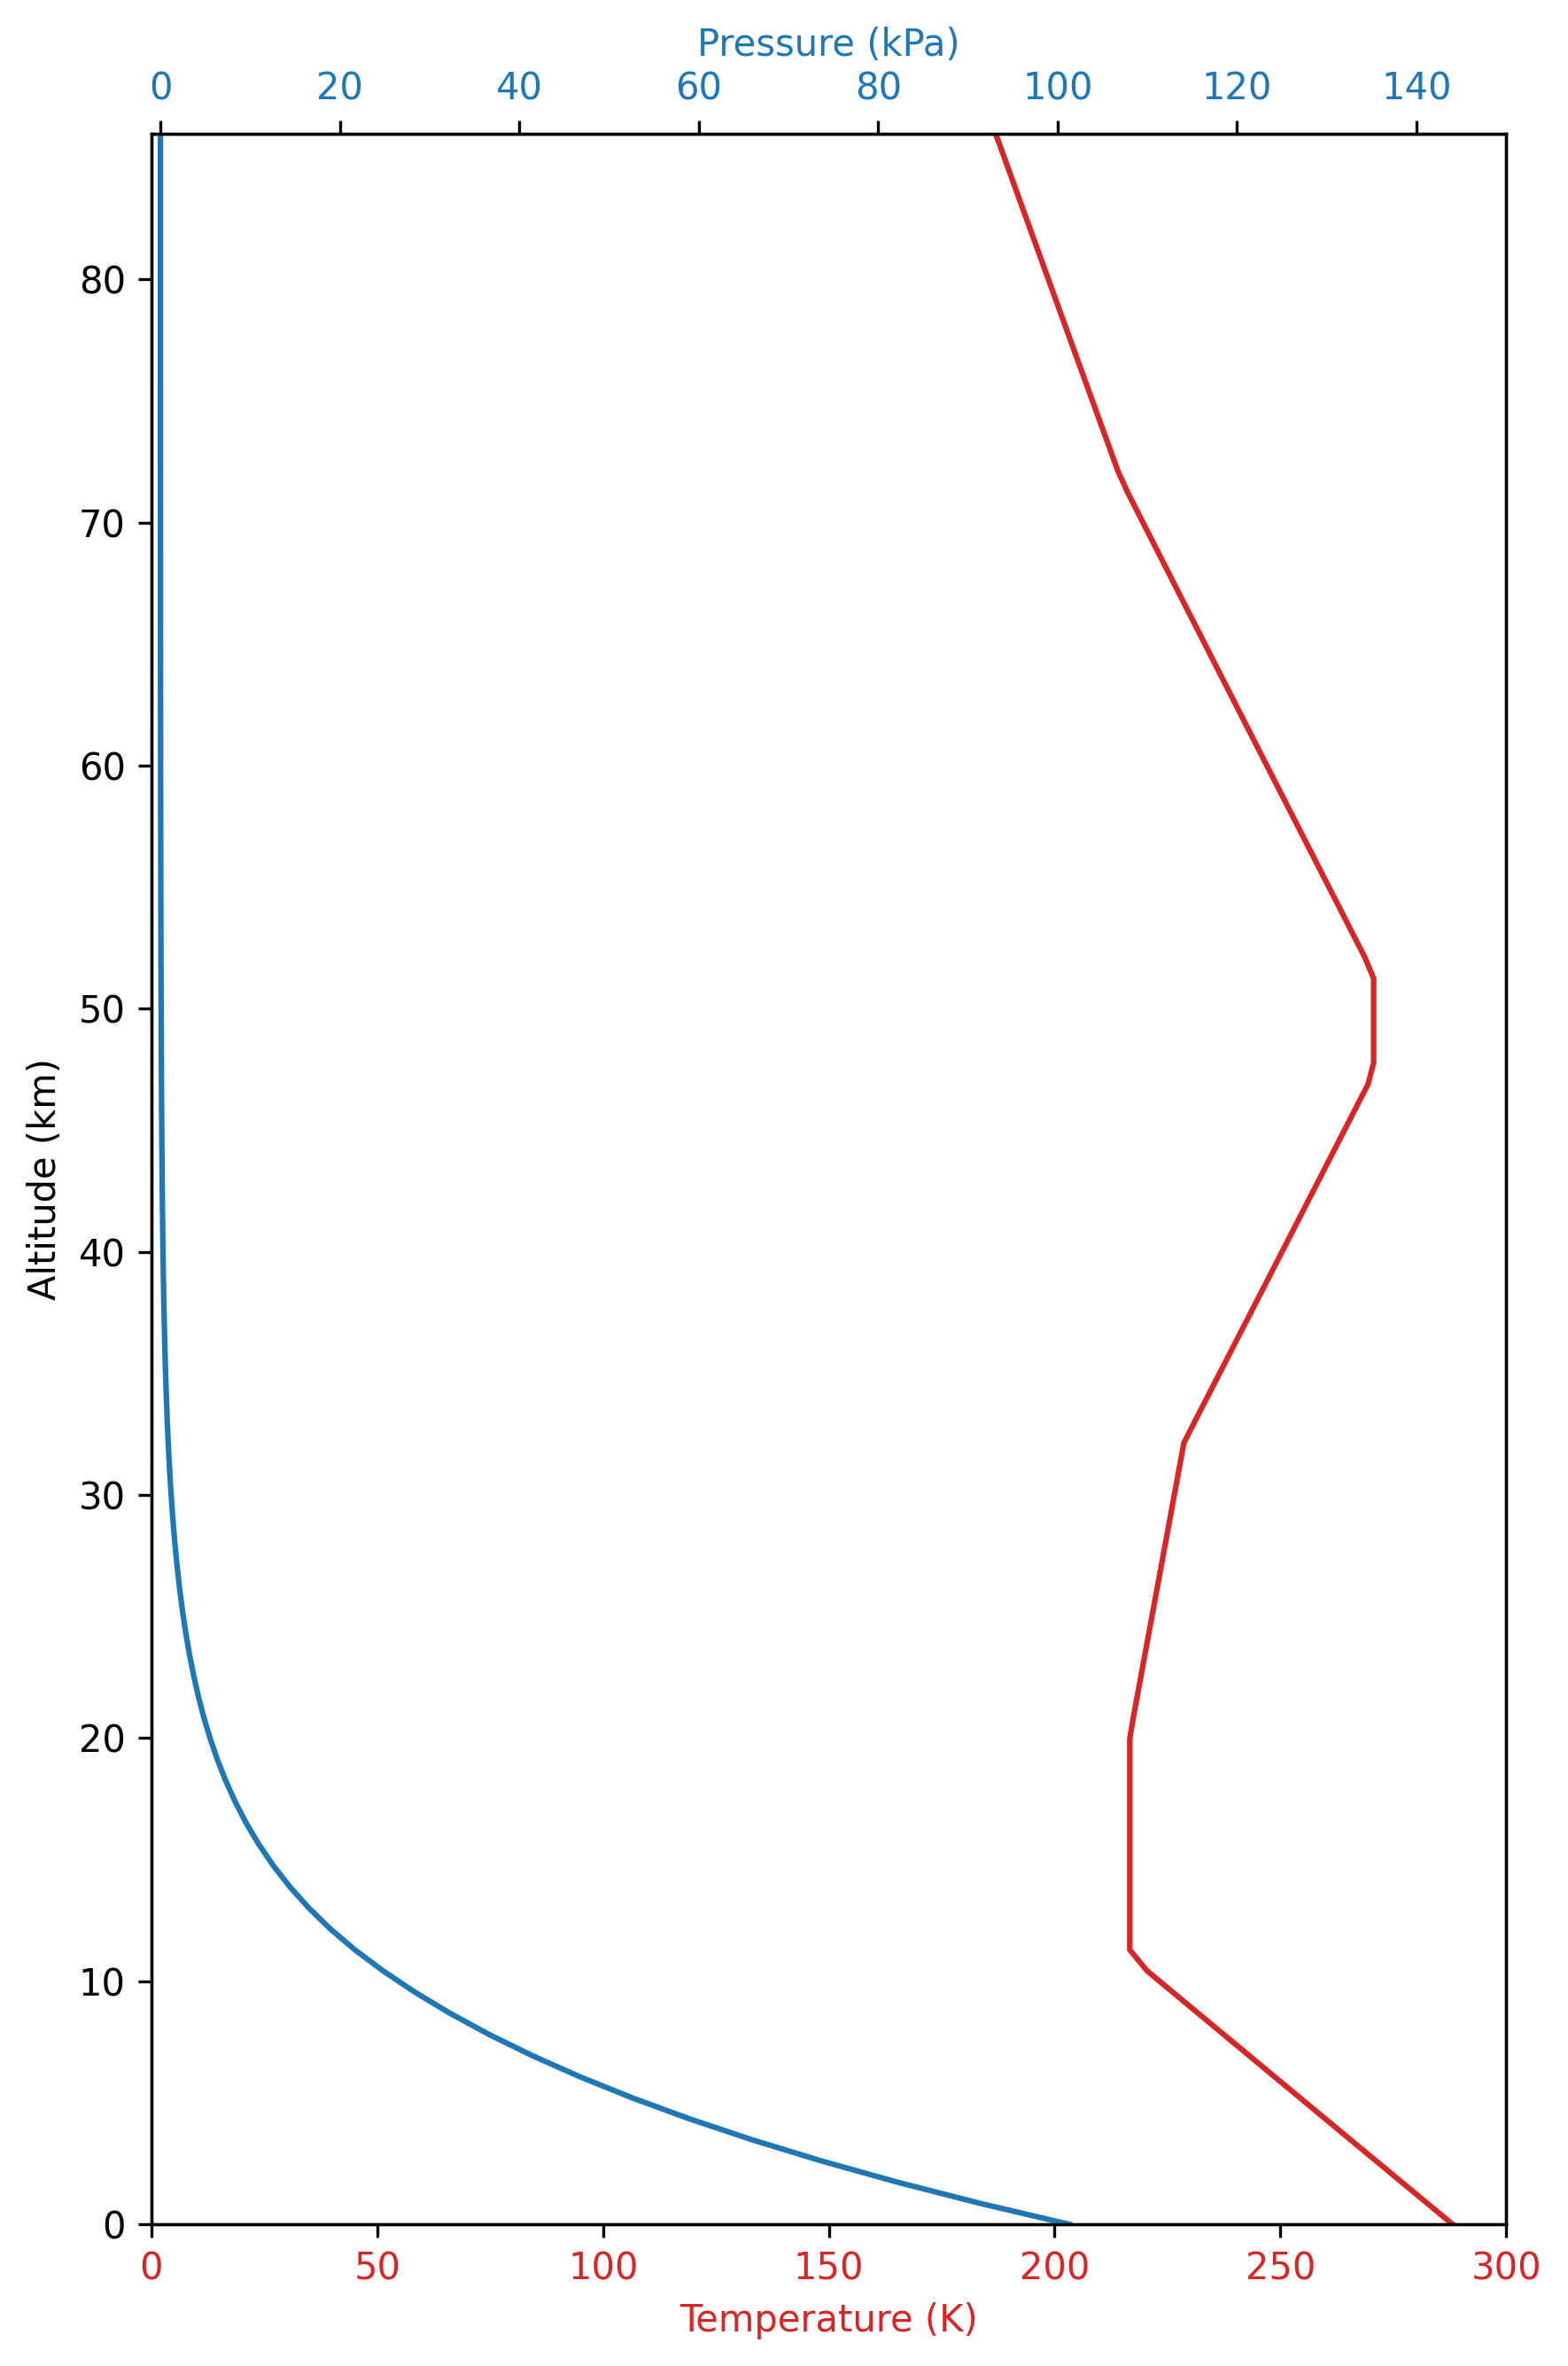

In [92]:
from fluids.atmosphere import ATMOSPHERE_1976

altitudes = np.linspace(0, 86, num=100)
pressures = np.zeros_like(altitudes)
temperatures = np.zeros_like(altitudes)
for idx, h in enumerate(altitudes):
    props = ATMOSPHERE_1976(h * 1000.)
    pressures[idx] = props.P
    temperatures[idx] = props.T

fig, ax = plt.subplots(layout='constrained', sharey=True,figsize=(6, 9))
color = 'tab:red'
ax.plot(temperatures, altitudes, color=color)
ax.set_ylim([0, 86.])
ax.set_xlim([0, 300.])
ax.set_ylabel('Altitude (km)')
ax.set_xlabel('Temperature (K)', color=color)
ax.tick_params(axis='x', labelcolor=color)

ax2 = ax.twiny()
color = 'tab:blue'
ax2.plot(pressures/1000., altitudes, color=color)
ax2.set_xlim([-1, 150.])
ax2.set_xlabel('Pressure (kPa)', color=color)
ax2.tick_params(axis='x', labelcolor=color)

fig.tight_layout()
plt.show()

## Variation of gravity

Acceleration due to gravity also changes with altitude, but this is less significant until reaching 
more-significant altitudes:
$$
g(h) = g_0 \left( \frac{R_0}{R_0 + h} \right)^2 \;,
$$
where $R_0$ = 6378.388 km is the mean radius of Earth, and
$g_0$ = 9.80665 m/s<sup>2</sup> is the standard gravitational acceleration at sea level.

Of course, the Earth neither has a constant radius, nor is it actually a sphere.
(In fact, it is an **oblate spheroid**, with a slight bulge at the Equator and flatter at the poles.)

However, even neglecting these features, gravity only varies a small amount with altitude.
Consider variation from the surface to the approximate orbit of the International Space Station (around 250 miles):

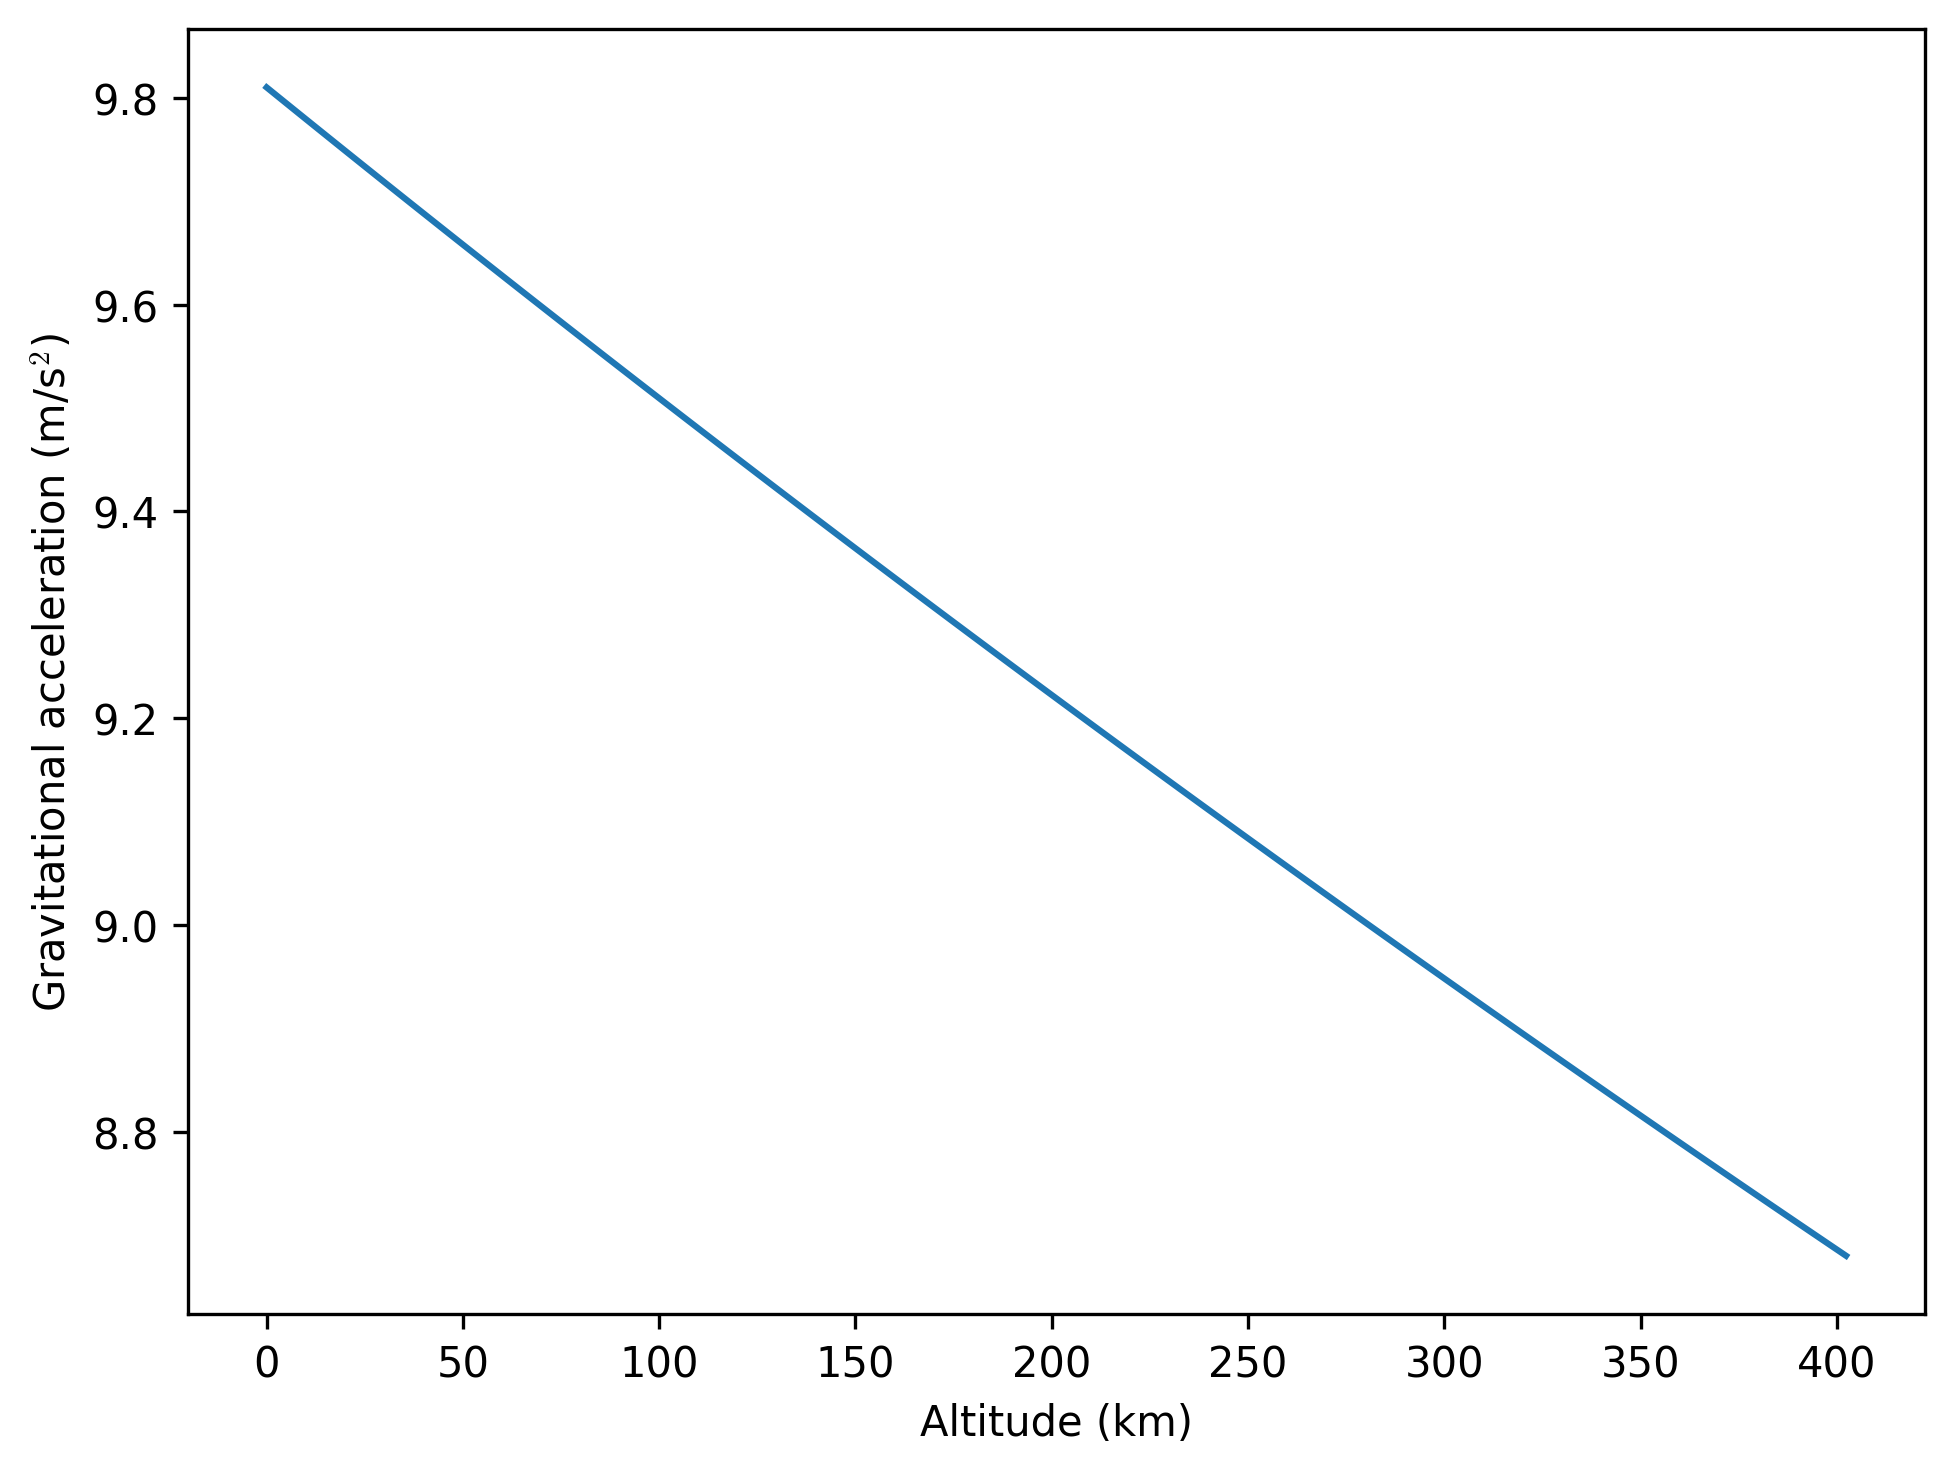

In [ ]:
R0 = Q_(6378.388, 'km')
h_ISS = Q_(250, 'miles').to('km')
altitudes = np.linspace(0., h_ISS.magnitude, num=100) * ureg.km
gravities = g0 * (R0 / (R0 + altitudes))**2

fig, ax = plt.subplots(layout='constrained')
ax.plot(altitudes.magnitude, gravities.to('m/s^2').magnitude)
ax.set_xlabel('Altitude (km)')
ax.set_ylabel(r'Gravitational acceleration (m/s$^2$)')

plt.show()

In other words, even in orbit, the astronauts on the space station are experiencing ~88% the same acceleration due to gravity that we are on the surface.

The difference is that they are orbiting at a substantial angular velocity, with the resulting centrifugal force counteracting gravity and leading to the experience of weightlessness.

:::{note}
Like the more complex models for atmospheric properties, standard models exist for how gravity varies around the Earth in more detail, when precise calculations are needed. For example, the Earth Gravitational Model 2008 {cite:p}`Pavlis2012` is a state-of-the-art model for gravity's variation based on spherical harmonics, developed by the National Geospatial-Intelligence Agency.
:::

## Example: Numerical integration of vertical launch

Determine the burnout velocity and maximum height achieved by launching 
the German V-2 rocket, assuming a vertical launch. Take into account drag,
the variation of atmospheric density with altitude, and the variation of gravity
with altitude. Use an explicit numerical method to solve the system of equations.

Given data:
- specific impulse: $I_{\text{sp}}$ = 250 sec
- initial mass: $m_0$ = 12700 kg
- propellant mass: $m_p$ = 8610 kg
- burn time: $t_b$ = 60 sec
- maximum body diameter: $D$ = 5 feet 4 inches (5.333 ft)
- height: $H$ = 46 feet


Let's set up the system of ordinary differential equations for velocity ($m$),
altitude ($h$), and mass ($m$) that describes this problem:

$$
\begin{align*}
\frac{dv}{dt} &= -\frac{I_{\text{sp}} g_0}{m} \frac{dm}{dt} - \frac{1}{2} \rho (h) v^2 A C_D (h) - g(h) \\
\frac{dh}{dt} &= v \\
\frac{dm}{dt} &= -\dot{m} = -\frac{m_p}{t_b} \;,
\end{align*}
$$

where we obtained the last equation by recognizing that

$$
\begin{align*}
m_f &= m_0 - \dot{m} t_b \\
m_p &= m_0 - m_f = \dot{m} t_b \\
\dot{m} &= \frac{m_p}{t_b}
\end{align*}
$$

for steady burning.
In the above, $g_0$ is the reference acceleration due to 
gravity (9.80065 m/s<sup>2</sup>), $\rho(h)$ is the atmospheric density,
$A$ is the cross-sectional area of the body, 
$C_D$ is the drag coefficient, and
$g(h)$ is the (varying) acceleration due to gravity.

**Density and gravity:**
To move forward, we need to describe how to evaluate density, 
gravitational acceleration, and the coefficient of drag at any instant in time.
The first two are known functions of altitude:

$$
\begin{align*}
\rho (h) &= \rho_0 e^{-h / H_n} \\
g(h) &= g_0 \left( \frac{R_0}{R_0 + h} \right)^2 \;,
\end{align*}
$$

where $\rho_0$ = 1.225 kg/m<sup>3</sup> is the density at sea level, 
$H_n$ = 10.4 km is the height scale of the exponential fall,
$R_0$ = 6378.388 km is the mean radius of Earth, and
$g_0$ = 9.80665 m/s<sup>2</sup> is the sea-level acceleration due to gravity.

```{note} Exponential approximations
The exponential approximations we use for the variation of density and pressure
in the atmosphere are only so good; more-accurate calculations would need to
use a better model.
```

### Coefficient of drag

Coefficient of drag is more difficult to handle, since it depends on angle of
attack and Mach number: $C_D = C_D(M, \alpha)$. For vertical flight, the angle
of attack is zero ($\alpha = 0$), but the Mach number will be changing both as
the vehicle speed changes and the atmospheric conditions change with altitude:

$$
M = \frac{v}{\sqrt{ \gamma p(h) / \rho(h) }}
$$

**Option 1:** 
As a first approximation, we could simply assume a constant value for coefficient of drag.
For example, before and after the transonic regime (where Mach number approaches 1),
$C_D \approx 0.15$.

**Option 2:** 
If we want to more-accurately capture the increase in coefficient of drag as
the vehicle approaches a sonic velocity, and then the relaxation when supersonic,
we need to capture the dependence of $C_D$ on Mach number.

First, we already have an expression for $\rho(h)$, but we also need an expression
for pressure. We can use a similar exponential approximation:

$$
p(h) = p_0 e^{-h / H_p} \;,
$$

where $p_0$ = 101325 Pa is the sea-level standard atmospheric pressure
and $H_p$ = 8.4 km.
With $\gamma = 1.4$ being a reasonable constant, we can now calculate Mach number based on velocity and altitude.

Now, we need to obtain a functional dependence of $C_D (M)$;
based on {numref}`V2-diagrams`, we see that the relationship is fairly complex.
The "easiest" way to create a function for $C_D (M)$ is to:
- Extract data points from the plot manually, using a tool such as [WebPlotDigitizer](https://automeris.io/WebPlotDigitizer/index.html)
- Perform a spline interpolation on the data points, using a function such as `spline` in Matlab or `scipy.interpolate.UnivariateSpline` in Python.

Let's see this in action, using data extracted manually from the source figure:

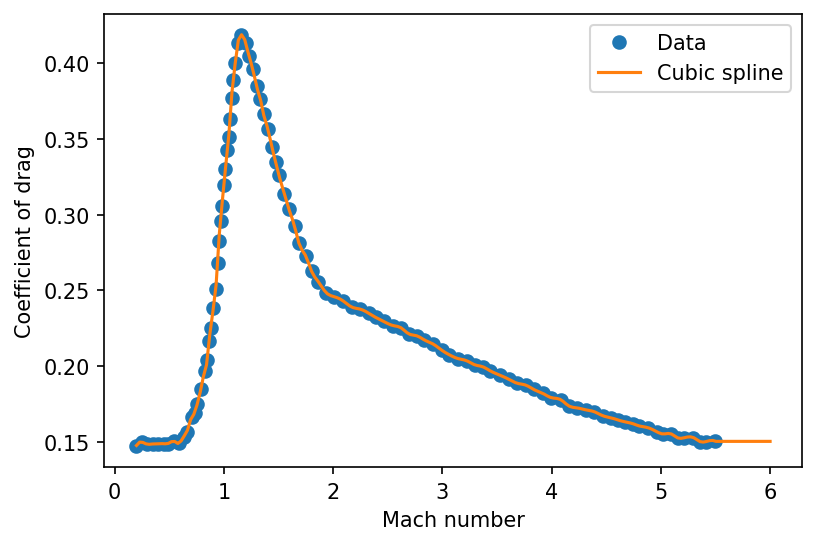

In [62]:
import numpy as np
from scipy.interpolate import UnivariateSpline

data = np.genfromtxt('coefficient-drag.csv', delimiter=',')

coefficient_drag = UnivariateSpline(data[:,0], data[:,1], s=0, ext='const')

mach = np.linspace(0.2, 6, num=200, endpoint=True)
plt.plot(data[:,0], data[:,1], 'o', mach, coefficient_drag(mach), '-')
plt.xlabel('Mach number')
plt.ylabel('Coefficient of drag')
plt.legend(['Data', 'Cubic spline'])
plt.show()

Now that we have a fully defined system of equations, we need a numerical method to integrate.
We can use the `solve_ivp` function from SciPy, and specify the `RK45` method (fourth-order Runge–Kutta, using an embedded fifth-order method to control error and adapt the time step size).

To implement, we need to create a function to evaluate the time derivatives, and then specify initial conditions for velocity, altitude, and mass:
$v(t = 0) = 0$, $h(t = 0) = 0$, and $m(t = 0) = m_0$.

In [63]:
from scipy.integrate import solve_ivp

def vertical_launch(t, y, spec_impulse, mass_prop, time_burn, diameter, coef_drag):
    '''Evaluates system of time derivatives for velocity, altitude, and mass.
    '''
    radius_earth = 6378.388 * 1e3
    gravity_ref = 9.80665
    density_ref = 1.225
    pressure_ref = 101325
    gamma = 1.4
    height_den = 10400
    height_pres = 8400
    
    v = y[0]
    h = y[1]
    m = y[2]
    
    gravity = gravity_ref * (radius_earth / (radius_earth + h))**2
    density = density_ref * np.exp(-h / height_den)
    pressure = pressure_ref * np.exp(-h / height_pres)
    
    mach = v / np.sqrt(gamma * pressure / density)
    area = np.pi * diameter**2 / 4
    drag = 0.5 * density * v**2 * area * coef_drag(mach)
    
    dmdt = -mass_prop / time_burn
    dvdt = (-spec_impulse * gravity_ref / m) * dmdt - drag / m - gravity
    dhdt = v
    
    return [dvdt, dhdt, dmdt]

# given constants
spec_impulse = 250
mass_initial = 12700
mass_propellant = 8610
time_burn = 60
diameter = 1.626

sol = solve_ivp(
    vertical_launch, [0, time_burn], [0, 0, mass_initial], method='RK45', 
    args=(spec_impulse, mass_propellant, time_burn, diameter, coefficient_drag),
    dense_output=True
    )

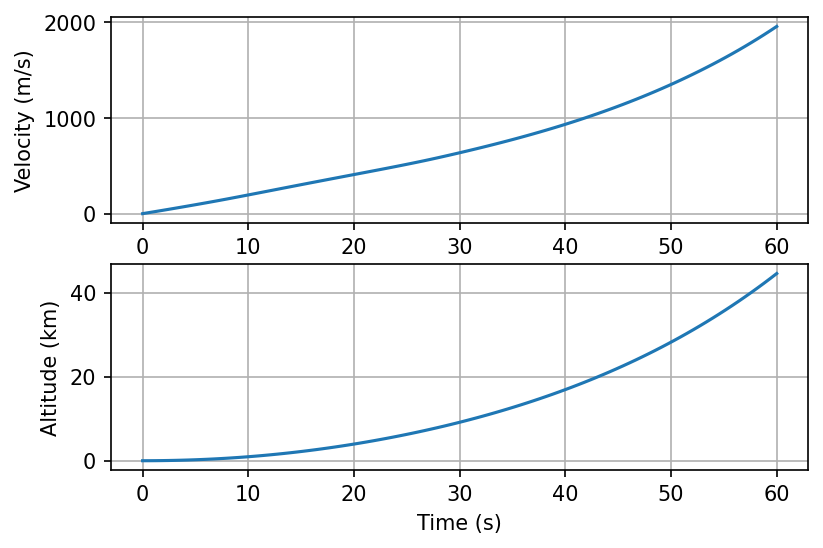

Burnout velocity:  1956.11 m/s
Burnout altitude:  44.54 km


In [66]:
time = np.linspace(0, time_burn, 100)
z = sol.sol(time)

fig, axes = plt.subplots(2, 1)

axes[0].plot(time, z[0, :])
axes[0].set_ylabel('Velocity (m/s)')
axes[0].grid(True)

axes[1].plot(time, z[1, :] / 1000)
axes[1].set_ylabel('Altitude (km)')
axes[1].set_xlabel('Time (s)')
axes[1].grid(True)

plt.show()

print(f'Burnout velocity: {z[0,-1]: 5.2f} m/s')
print(f'Burnout altitude: {z[1,-1]/1000: 5.2f} km')